Problem:
An educational institution is conducting a data science lab where students are tasked with analyzing and
predicting national economic trends based on historical per capita income data. The aim is to help
students understand the application of statistical models in economics, specifically in predicting future
economic conditions from past data.

Trend Analysis:

In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head(2)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935


In [15]:
df.columns = ['year', 'per_capita_income_usdollar']
print("Renamed Column Names:", df.columns)
print(df.head(2))

Renamed Column Names: Index(['year', 'per_capita_income_usdollar'], dtype='object')
   year  per_capita_income_usdollar
0  1970                 3399.299037
1  1971                 3768.297935


Linear Regression Model:
How can you fit a linear regression model to predict per capita income based on the year? 
What is the equation of the fitted linear regression model?
How well does the linear regression model fit the data? (Evaluate using R-squared and residual plots.)

In [17]:
X = df['year'].values.reshape(-1, 1)  # Independent variable (year)
y = df['per_capita_income_usdollar'].values    # Dependent variable (per capita income)

In [18]:
# Fit the linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

How well does the linear regression model fit the data? (Evaluate using R-squared and residual plots.)

In [19]:
# Calculate R-squared
r_squared = model.score(X, y)

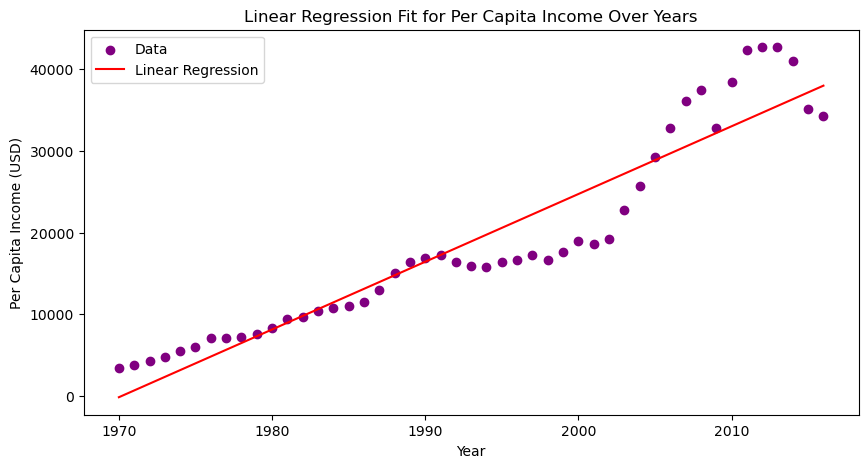

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='purple', marker='o', label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression Fit for Per Capita Income Over Years')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.legend()
plt.show()

In [22]:
print("R-squared:", r_squared)

R-squared: 0.890916917957032


Prediction: Using the fitted linear regression model, predict the per capita income for the year 2020. How accurate do you think this prediction will be given the historical data?

In [23]:
# Prepare data for prediction
X_pred = np.array([[2020]])  # Year 2020

# Predict per capita income for 2020
predicted_income_2020 = model.predict(X_pred)

print("Predicted per capita income for 2020:", predicted_income_2020[0])

Predicted per capita income for 2020: 41288.69409441762


Model Evaluation:
What are the limitations of using a linear regression model for this dataset? How can you assess the accuracy of your predictions?
Would a different type of regression (e.g., polynomial regression) provide a better fit? Why or why not?

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fitting polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
polynomial_model = LinearRegression()
polynomial_model.fit(X_poly, y)


LinearRegression()

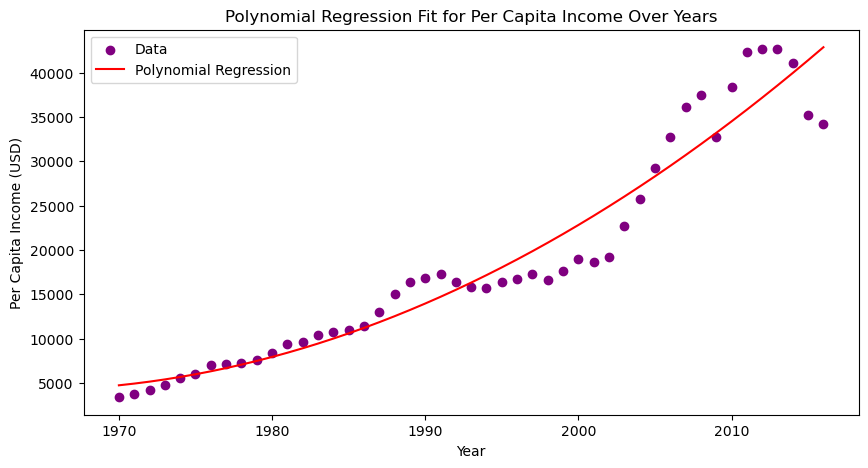

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='purple', marker='o', label='Data')
plt.plot(X, polynomial_model.predict(X_poly), color='red', label='Polynomial Regression')
plt.title('Polynomial Regression Fit for Per Capita Income Over Years')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.legend()
plt.show()

In [27]:
# Assessing model fit
r_squared = polynomial_model.score(X_poly, y)
print("R-squared:", r_squared)

R-squared: 0.9290565008926883


Data Preparation and Cleaning:
Are there any outliers in the data? If so, how would you handle them?
Is there any missing data in the dataset? How would you deal with it?

In [29]:
# Identify outliers
Q1 = df['per_capita_income_usdollar'].quantile(0.25)
Q3 = df['per_capita_income_usdollar'].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = df[(df['per_capita_income_usdollar'] < (Q1 - 1.5 * IQR)) | (df['per_capita_income_usdollar'] > (Q3 + 1.5 * IQR))]

# Identify missing data
missing_data = df.isnull().sum()

print("Outliers:")
print(outliers)

print("\nMissing Data:")
print(missing_data)

Outliers:
Empty DataFrame
Columns: [year, per_capita_income_usdollar]
Index: []

Missing Data:
year                          0
per_capita_income_usdollar    0
dtype: int64


Exploratory Data Analysis:
Create visualizations (line plots, scatter plots) to explore the relationship between year and per capita income.
What do these visualizations tell you about the data?

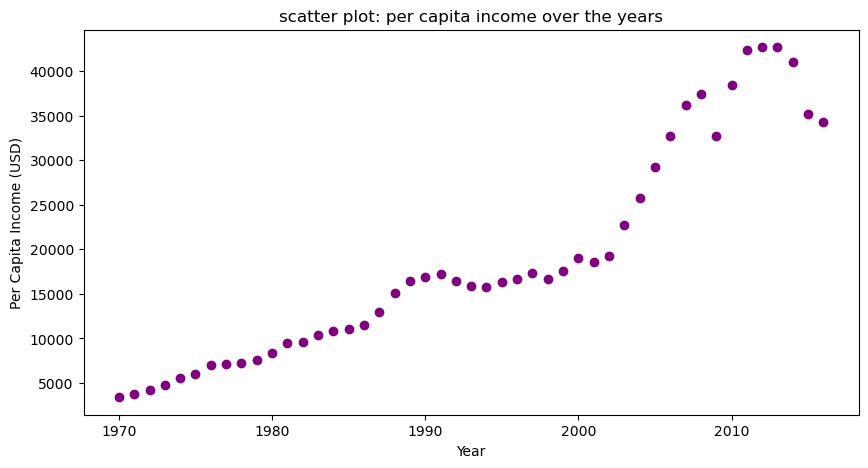

In [40]:
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.scatter(df['year'], df['per_capita_income_usdollar'], color='purple', marker='o')
plt.title('scatter plot: per capita income over the years')
plt.show()

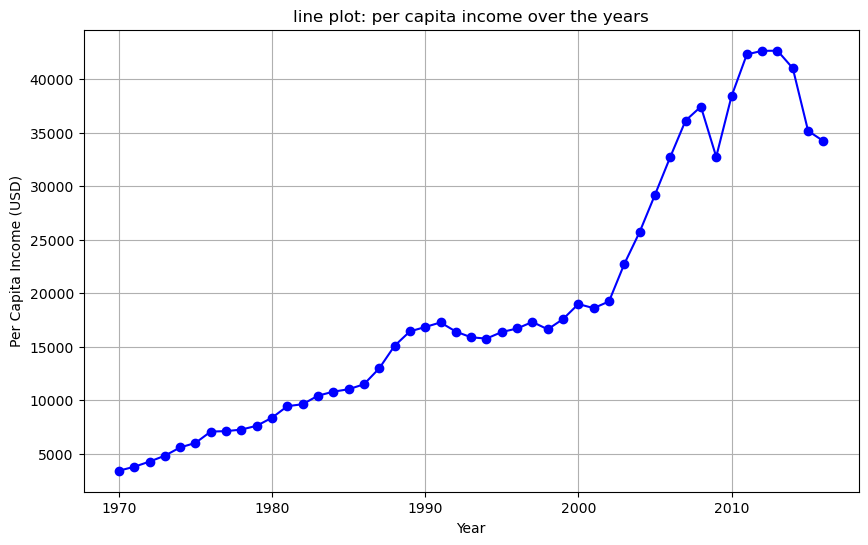

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['per_capita_income_usdollar'], marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.title('line plot: per capita income over the years')
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate Linear Regression model
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)
linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)
print("Linear Regression Train MSE:", linear_train_mse)
print("Linear Regression Test MSE:", linear_test_mse)


Linear Regression Train MSE: 15601711.085010435
Linear Regression Test MSE: 15147815.5477862


Advanced Analysis:
Split the data into training and testing sets. Fit the linear regression model on the training set and evaluate its performance on the testing set. Compare the performance of the linear regression model with other models, such as polynomial regression or moving average models.

In [35]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)



LinearRegression()

In [36]:
# Evaluate Polynomial Regression model
poly_train_pred = poly_model.predict(X_train_poly)
poly_test_pred = poly_model.predict(X_test_poly)
poly_train_mse = mean_squared_error(y_train, poly_train_pred)
poly_test_mse = mean_squared_error(y_test, poly_test_pred)
print("Polynomial Regression Train MSE:", poly_train_mse)
print("Polynomial Regression Test MSE:", poly_test_mse)



Polynomial Regression Train MSE: 11198017.942552079
Polynomial Regression Test MSE: 6257614.352065085


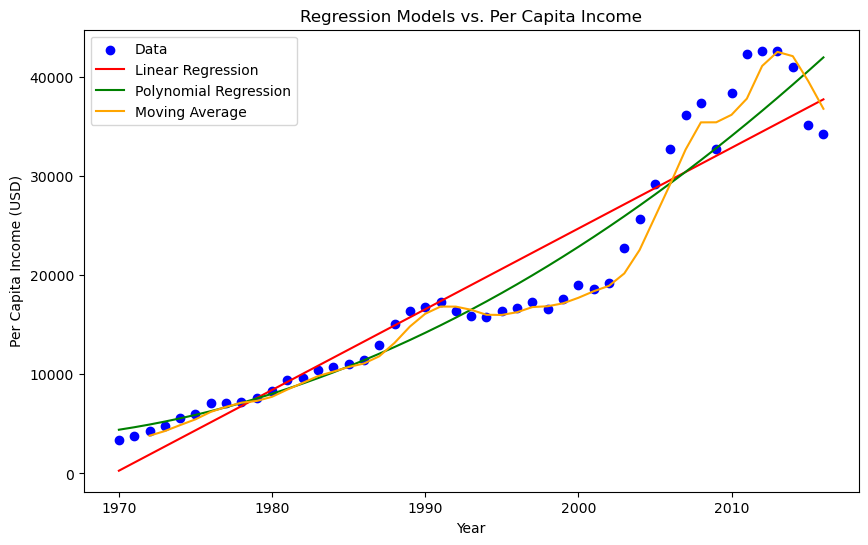

In [37]:
# Moving Average Model
# Example: Moving average over the last 3 years
ma_window = 3
df['moving_average'] = df['per_capita_income_usdollar'].rolling(window=ma_window).mean()

# Plot the data and models
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['per_capita_income_usdollar'], color='blue', label='Data')
plt.plot(df['year'], linear_model.predict(X), color='red', label='Linear Regression')
plt.plot(df['year'], poly_model.predict(poly_features.transform(X)), color='green', label='Polynomial Regression')
plt.plot(df['year'], df['moving_average'], color='orange', label='Moving Average')
plt.title('Regression Models vs. Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (USD)')
plt.legend()
plt.show()